아래의 데이터에 기반하여 인사이트를 얻고, 의사결정
https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

**목표1**
다음 분기에 어떤 게임을 설계해야 할까?
**목표2**
1)지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2)연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3)출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [7]:

#Data 전처리
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')  
df = df.drop(columns=['Unnamed: 0'], axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
#Data 전처리 
drop_str = ['M','K']
df = df[~df['NA_Sales'].str.contains('|'.join(drop_str))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_str))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_str))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_str))]

df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])
df = df.dropna()

In [9]:
#Data 전처리 
def change_year(x):
  if (x >= 0) & (x < 17):
    return int(2000 + x)
  elif (x > 30) & (x < 100):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(change_year)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000
mean,2006.403851,0.263680,0.146372,0.077810,0.048344
std,5.834873,0.824188,0.510354,0.309821,0.192612
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2017.000000,41.490000,29.020000,10.220000,10.570000


In [11]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


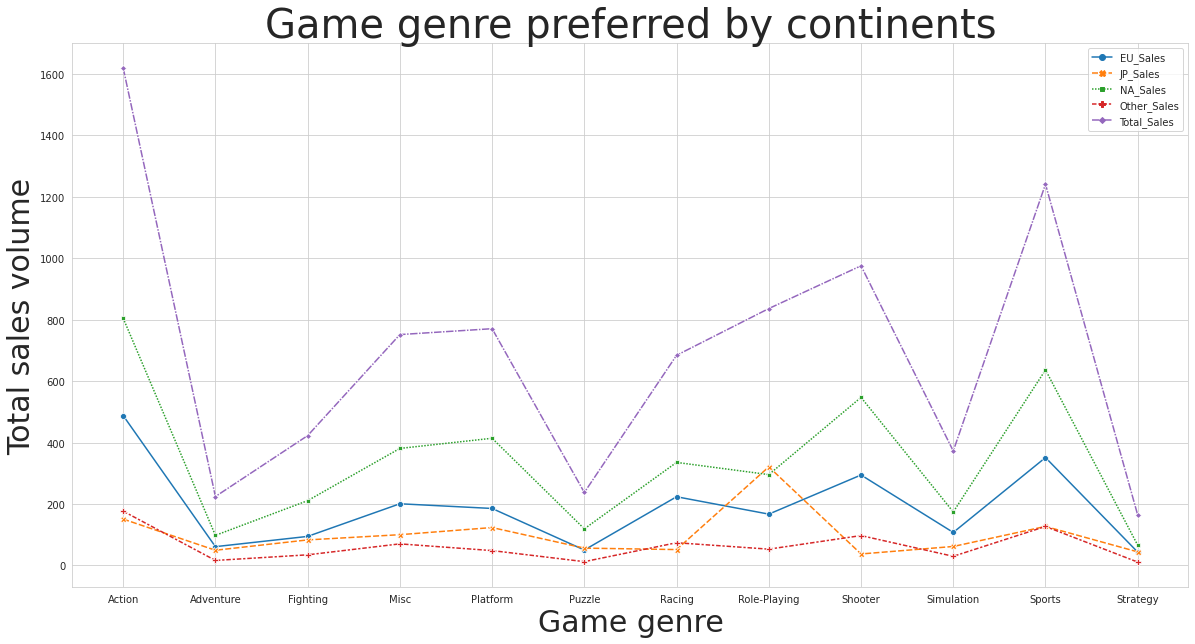

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum() 
df_genre = df_genre.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum()
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() 
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() 
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() 
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
plt.title('Game genre preferred by continents', fontsize=40)
plt.xlabel('Game genre', fontsize=30)
plt.ylabel('Total sales volume', fontsize=30)

sns.lineplot(data=df_genre, markers=True);

**지역에 따라서 선호하는 게임 장르가 다를까 ?**
전 대륙 게임 선호도 1위는 Action 2위는 Sports  3위는 Strategy
각 대륙별 선호도 또한  비슷한 양상을 뛰었으나 일본의 게임 선호도의 1위는 Role-Playing 였다.

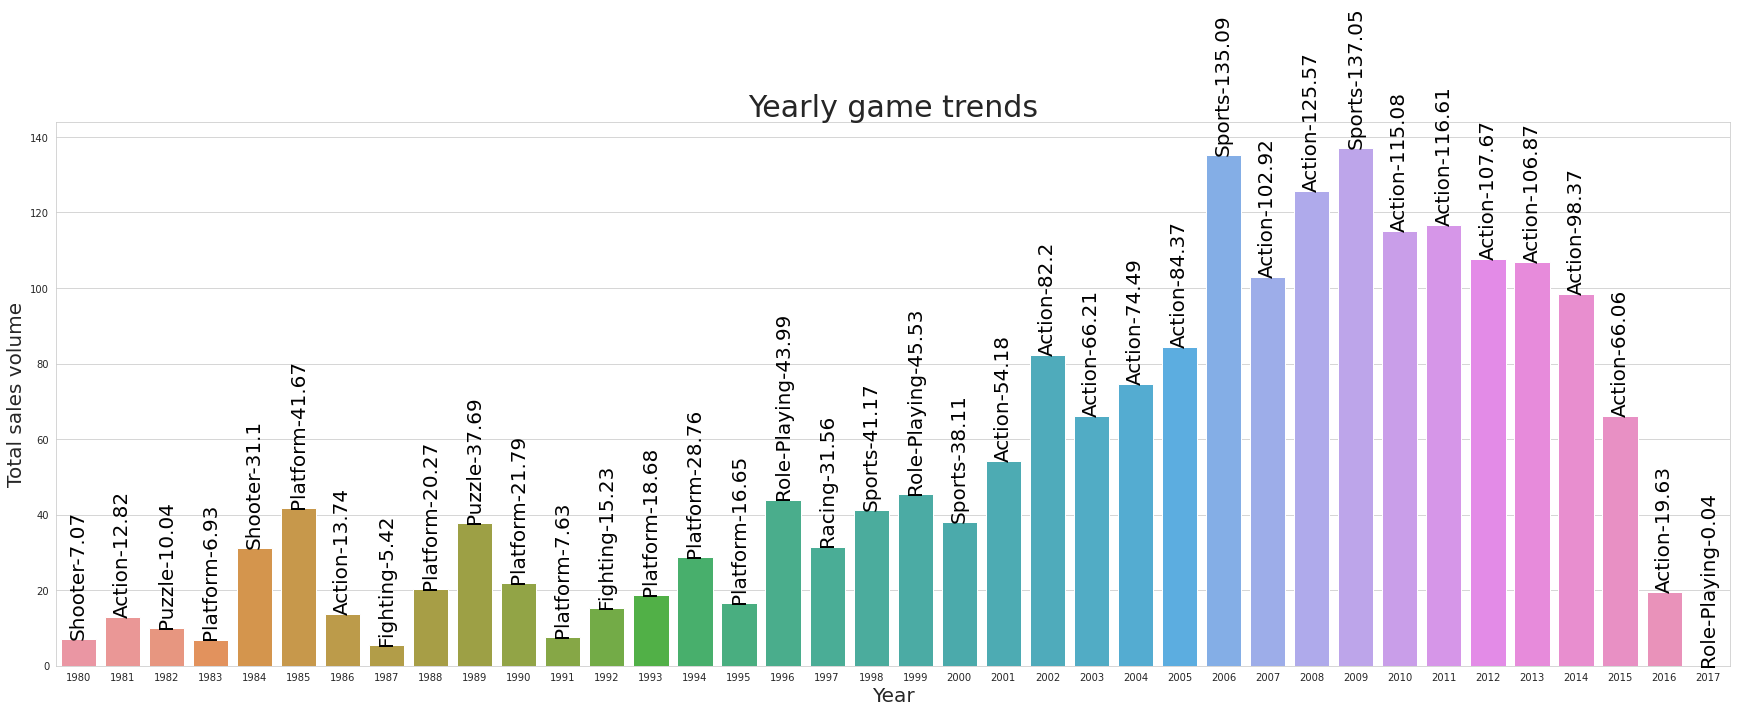

In [69]:
df_year_dx = df.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
df_year = df_year_dx .groupby(by=['Year'])['Total_Sales'].transform(max) == df_year_dx ['Total_Sales']
df_year_max = df_year_dx [df_year].reset_index(drop=True)

genre = df_year_max ['Genre']

plt.figure(figsize=(30, 10))
g = sns.barplot(x='Year', y='Total_Sales', data=df_year_max )
index = 0
for value in df_year_max ['Total_Sales']:
    g.text(index, value +1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha='center')
    index += 1

plt.title('Yearly game trends', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total sales volume', fontsize=20)

plt.xticks(rotation=0)
plt.show()

** 연도별 게임의 트렌드가 있을까 ? **

위 차트에서 눈여겨 볼 점은 2000년대 부터 Action 게임이 주를 이루고있다는점이다. 
최근년도에는 아직 데이터량이 부족해서인지 Role-Playing 이 선호도가 높은걸 볼 수있다. 

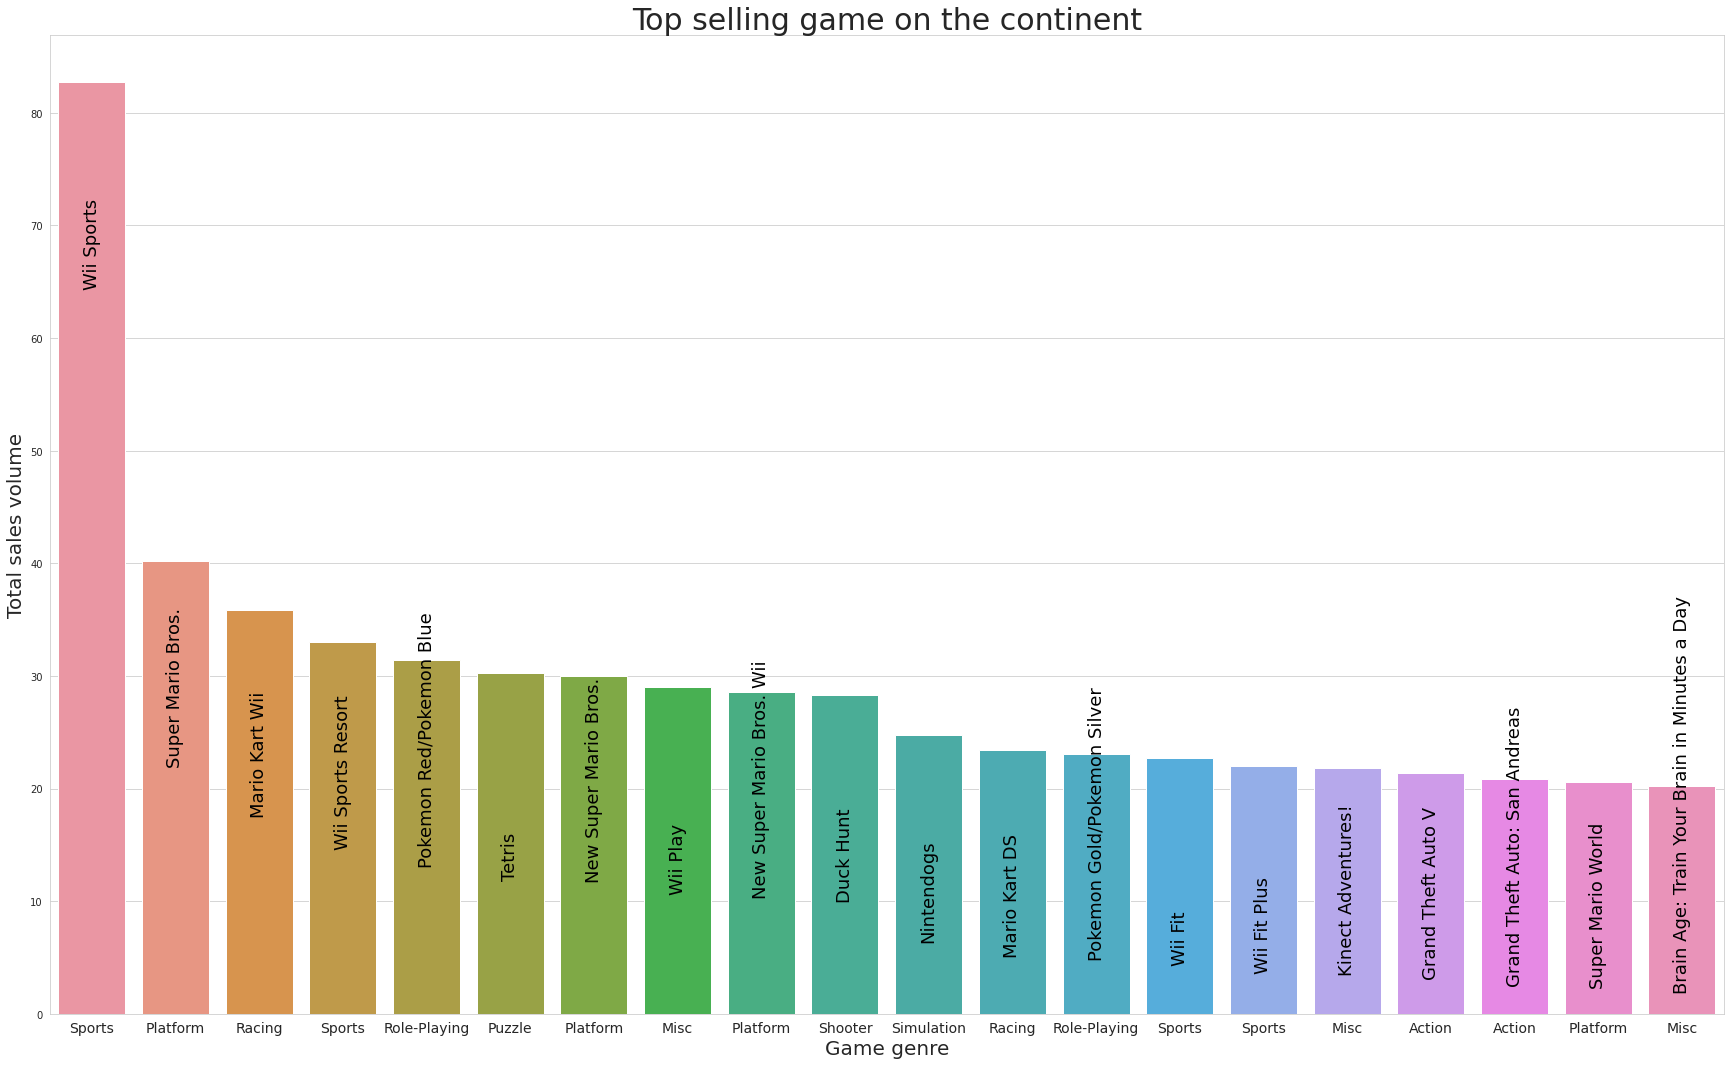

In [70]:
import numpy as np
sortdf = df.sort_values(by=['Total_Sales'], ascending=False)
game_sale = sortdf.head(20)
game_sale = game_sale[['Name', 'Year', 'Genre', 'Total_Sales']]
game_sale = game_sale.sort_values(by=['Total_Sales'], ascending=False)
game_sale = game_sale.reset_index(drop=True)

name = game_sale['Name']
year = game_sale['Genre']
y = np.arange(0, 20)

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Total_Sales', data=game_sale)
index = 0
for value in game_sale['Total_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=18, rotation= 90, ha="center")
    index += 1

plt.xticks(y, game_sale['Genre'], fontsize=14, rotation=0)
plt.title('Top selling game on the continent', fontsize=30)
plt.xlabel('Game genre', fontsize=20)
plt.ylabel('Total sales volume', fontsize=20)
plt.show()

**출고량이 높은 게임에 대한 분석 및 시각화 프로세스**
Wii Sports의 독주로 보인다. 
하지만 년도별 게임 선호도 차트에서 Action 게임의 선호도가 2000년대이후부터 대부분이었지만 현재 개별 게임 차트로는 Sports 게임이 많다는걸 알수있다.
위 차트로 알수있는점은 Action 게임이 초히트작보다는 많은 수의 Action 게임이  평균이상의 판매가 나온걸 추측할수있다.

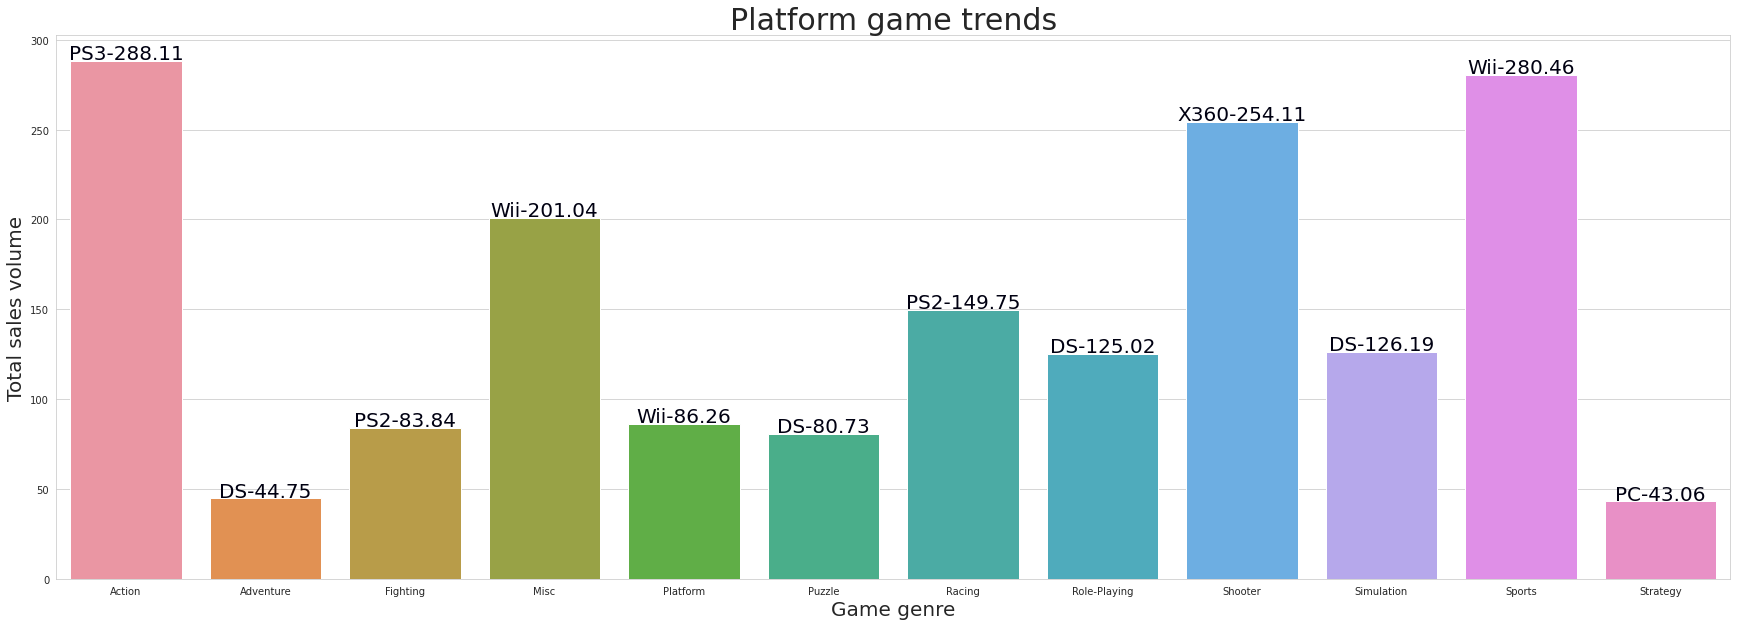

In [74]:
df_Pf_dx = df.groupby(by=['Genre', 'Platform'])['Total_Sales'].sum().reset_index()
df_Pf = df_Pf_dx .groupby(by=['Genre'])['Total_Sales'].transform(max) == df_Pf_dx ['Total_Sales']
df_Pf_max = df_Pf_dx [df_Pf].reset_index(drop=True)

genre = df_Pf_max ['Platform']

plt.figure(figsize=(30, 10))
g = sns.barplot(x='Genre', y='Total_Sales', data=df_Pf_max )
index = 0
for value in df_Pf_max ['Total_Sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#001', size=20, rotation= 0, ha='center')
    index += 1

plt.title('Platform game trends', fontsize=30)
plt.xlabel('Game genre', fontsize=20)
plt.ylabel('Total sales volume', fontsize=20)

plt.xticks(rotation=0)
plt.show()

위에 있는 게임장르별 플랫폼 선호도 차트에서 보면 Action 게임을 설계하려면 PS3기반의 플랫폼이 유리하며, Sports 게임은 Wii 기반의 플랫폼이 유리한걸 알수있다.  

마지막으로 다음 분기 게임설계를 기획하자면 초히트작을 목표로 많은 자본과 기간을 투입한다면 Will 기반의 Sports 게임을 설계가 좋고, 평균이상의 판매량을 목표를 잡으면 PS3 기반의 Action 게임의 설계가 유리해 보인다.